<a href="https://colab.research.google.com/github/mwinzie/Football-Analysis-Mchezopesa-Limited/blob/master/Moringa_Data_Science_Core_W6_Independent_Project_Agnes_Mwinzi_DataScience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#loading the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import datetime as dt
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt


In [0]:
#loading the datasets
ranking = pd.read_csv('fifa_ranking.csv')
results = pd.read_csv('results.csv')

In [0]:
#previewing the first two observations in the ranking dataset
ranking.head(2)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08


In [0]:
#previewing the first two observations in the results dataset
results.head(2)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False


In [0]:
#creating a new column to show the winning team
winner = []
for i in range(len(results['home_team'])):
  if results['home_score'][i] > results['away_score'][i]:
    winner.append('win')
  elif results['home_score'][i] < results['away_score'][i]:
    winner.append('lose')
  else:
    winner.append('draw')
    
results['game_result'] = winner

In [0]:
#checking the informations contained in the datasets 
print(results.info())
print('************************')
print(ranking.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
date          40839 non-null object
home_team     40839 non-null object
away_team     40839 non-null object
home_score    40839 non-null int64
away_score    40839 non-null int64
tournament    40839 non-null object
city          40839 non-null object
country       40839 non-null object
neutral       40839 non-null bool
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB
None
************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
rank                       57793 non-null int64
country_full               57793 non-null object
country_abrv               57793 non-null object
total_points               57793 non-null float64
previous_points            57793 non-null int64
rank_change                57793 non-null int64
cur_year_avg               57793 non-null float64
cur_year_avg_weighted      57793

Here we get to see the datatypes of the columns in the datasets. The results dataset has 40,839 rows and 9 columns while the ranking dataset has 57,793 rows and 16 columns. 

From the data observations in the Fifa ranking csv(ranking dataset), ranking began in the year 1993, so the data before 1993 may not be useful in my model and prediction, hence I shall drop all observations below 1993 in the results dataset.

In [0]:
#dropping rows in the results dataset that are below the year 1993.
#I shall check for uniformity in the date column and then drop
results['date'].unique().tolist()
#converting the date column to date time datatype
results.date = pd.to_datetime(results.date)

In [0]:
#checking to confirm the datatype change
results.dtypes

date            datetime64[ns]
home_team               object
away_team               object
home_score               int64
away_score               int64
tournament              object
city                    object
country                 object
neutral                   bool
winning_team            object
dtype: object

In [0]:
results['date'].head(2)

0   1872-11-30
1   1873-03-08
Name: date, dtype: datetime64[ns]

In [20]:
results.head(2)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winning_team
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,win


In [0]:
#deleting the rows that are below 1993, when FIFA started ranking the teams
#results['year'] = results(['year']< 1993).dropna(how = 'all')
results = results.drop(results[(results.date < '1993-08-08')] .index)


In [57]:
ranking.tail(2)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [23]:
results.shape

(22924, 10)

In [24]:
ranking.shape

(57793, 16)

## Data Cleaning of the ranking dataset

In [0]:
#checking the columns in the ranking dataset
ranking.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')

In [0]:
#checking if there exists any null values
ranking.isnull().any()
#the dataset does not have any null values

rank                       False
country_full               False
country_abrv               False
total_points               False
previous_points            False
rank_change                False
cur_year_avg               False
cur_year_avg_weighted      False
last_year_avg              False
last_year_avg_weighted     False
two_year_ago_avg           False
two_year_ago_weighted      False
three_year_ago_avg         False
three_year_ago_weighted    False
confederation              False
rank_date                  False
dtype: bool

## Data Cleaning of the Results dataset

In [0]:
#checking the column names in the results dataset
results.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

In [0]:
#checking if there exists any null values
results.isnull().any()
#the dataset does not have any null values

date          False
home_team     False
away_team     False
home_score    False
away_score    False
tournament    False
city          False
country       False
neutral       False
dtype: bool

In [0]:
results.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'year', 'month'],
      dtype='object')

In [27]:
results.dtypes

date            datetime64[ns]
home_team               object
away_team               object
home_score               int64
away_score               int64
tournament              object
city                    object
country                 object
neutral                   bool
winning_team            object
dtype: object

In [0]:
#separate date column to month and year for results dataset
results['month']= results.date.dt.month
results['year']=results.date.dt.year

In [59]:
#previewing the dataset
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,game_result,month,year
17915,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,win,8,1993
17916,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,draw,8,1993
17917,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False,win,8,1993
17918,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False,win,8,1993
17919,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,lose,8,1993


In [0]:
#creating a column for matches showing what team played what team
results['game'] = results['home_team'] +' '+ ' vs ' + ' ' + results['away_team']

In [47]:
results.head(2)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winning_team,month,year,game
17915,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,win,8,1993,Bolivia vs Uruguay
17916,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,draw,8,1993,Brazil vs Mexico


In [35]:
ranking.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')

In [0]:
#converting the date column in the ranking dataset to type datetime
ranking['rank_date'] = pd.to_datetime(ranking.rank_date)

In [0]:
#separate date column to month and year for results dataset
ranking['month']= ranking.rank_date.dt.month
ranking['year']=ranking.rank_date.dt.year


In [40]:
ranking.head(2)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,month,year
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,8,1993
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,8,1993


In [64]:
#creating the home team dataframe to merge with the ranking dataset using year, month, and country name
hometeam = pd.merge(results, ranking, how = 'left', left_on=['year', 'month', 'home_team'], right_on=['year', 'month', 'country_full'])
hometeam.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,game_result,month,year,game,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,win,8,1993,Bolivia vs Uruguay,59.0,Bolivia,BOL,0.0,13.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
1,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,draw,8,1993,Brazil vs Mexico,8.0,Brazil,BRA,0.0,55.0,-5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False,win,8,1993,Ecuador vs Venezuela,35.0,Ecuador,ECU,0.0,23.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False,win,8,1993,Guinea vs Sierra Leone,65.0,Guinea,GUI,0.0,23.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1993-08-08
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,lose,8,1993,Paraguay vs Argentina,67.0,Paraguay,PAR,0.0,22.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [0]:
#renaming the rank column to show the home team rank
hometeam.rename(columns = {'rank':'hometeam_rank'}, inplace = True)

In [67]:
#previewing the dataset
hometeam.head(2)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,game_result,month,year,game,hometeam_rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,win,8,1993,Bolivia vs Uruguay,59.0,Bolivia,BOL,0.0,13.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
1,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,draw,8,1993,Brazil vs Mexico,8.0,Brazil,BRA,0.0,55.0,-5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [79]:
hometeam.shape

(22993, 29)

In [133]:
#creating the away team dataframe to merge with the ranking dataset using year, month, and country name
awayteam = pd.merge(results, ranking, how = 'left', left_on=['year', 'month', 'away_team'], right_on=['year', 'month', 'country_full'])
awayteam.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,game_result,month,year,game,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,win,8,1993,Bolivia vs Uruguay,22.0,Uruguay,URU,0.0,47.0,-6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
1,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,draw,8,1993,Brazil vs Mexico,14.0,Mexico,MEX,0.0,42.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,1993-08-08
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False,win,8,1993,Ecuador vs Venezuela,94.0,Venezuela,VEN,0.0,4.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False,win,8,1993,Guinea vs Sierra Leone,86.0,Sierra Leone,SLE,0.0,16.0,-7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1993-08-08
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,lose,8,1993,Paraguay vs Argentina,5.0,Argentina,ARG,0.0,51.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [0]:
#renaming the rank column to show the awy team rank
awayteam.rename(columns = {'rank':'awayteam_rank'}, inplace = True)

In [70]:
awayteam.head(2)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,game_result,month,year,game,awayteam_rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,win,8,1993,Bolivia vs Uruguay,59.0,Bolivia,BOL,0.0,13.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
1,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,draw,8,1993,Brazil vs Mexico,8.0,Brazil,BRA,0.0,55.0,-5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [135]:
awayteam.shape

(23000, 29)

In [136]:
#merging the hometeam and awayteam dataframes
teams = pd.merge(hometeam, awayteam , how ='left', left_on=['month','year', 'home_team', 'away_team'], right_on=['month','year', 'home_team', 'away_team'])
teams.head()

,date_x,home_team,away_team,home_score_x,away_score_x,tournament_x,city_x,country_x,neutral_x,game_result_x,month,year,game_x,hometeam_rank,country_full_x,country_abrv_x,total_points_x,previous_points_x,rank_change_x,cur_year_avg_x,cur_year_avg_weighted_x,last_year_avg_x,last_year_avg_weighted_x,two_year_ago_avg_x,two_year_ago_weighted_x,three_year_ago_avg_x,three_year_ago_weighted_x,confederation_x,rank_date_x,date_y,home_score_y,away_score_y,tournament_y,city_y,country_y,neutral_y,game_result_y,game_y,awayteam_rank,country_full_y,country_abrv_y,total_points_y,previous_points_y,rank_change_y,cur_year_avg_y,cur_year_avg_weighted_y,last_year_avg_y,last_year_avg_weighted_y,two_year_ago_avg_y,two_year_ago_weighted_y,three_year_ago_avg_y,three_year_ago_weighted_y,confederation_y,rank_date_y
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,win,8,1993,Bolivia vs Uruguay,59.0,Bolivia,BOL,0.0,13.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1993-08-08,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,win,Bolivia vs Uruguay,22.0,Uruguay,URU,0.0,47.0,-6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
1,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,draw,8,1993,Brazil vs Mexico,8.0,Brazil,BRA,0.0,55.0,-5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1993-08-08,1,1,Friendly,Maceió,Brazil,False,draw,Brazil vs Mexico,14.0,Mexico,MEX,0.0,42.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,1993-08-08
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False,win,8,1993,Ecuador vs Venezuela,35.0,Ecuador,ECU,0.0,23.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1993-08-08,5,0,FIFA World Cup qualification,Quito,Ecuador,False,win,Ecuador vs Venezuela,94.0,Venezuela,VEN,0.0,4.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False,win,8,1993,Guinea vs Sierra Leone,65.0,Guinea,GUI,0.0,23.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1993-08-08,1993-08-08,1,0,Friendly,Conakry,Guinea,False,win,Guinea vs Sierra Leone,86.0,Sierra Leone,SLE,0.0,16.0,-7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1993-08-08
4,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False,win,8,1993,Guinea vs Sierra Leone,65.0,Guinea,GUI,0.0,23.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1993-08-08,1993-08-09,4,0,Friendly,Conakry,Guinea,False,win,Guinea vs Sierra Leone,86.0,Sierra Leone,SLE,0.0,16.0,-7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1993-08-08


In [109]:
teams.columns

Index(['date_x', 'home_team', 'away_team', 'home_score_x', 'away_score_x',
       'tournament_x', 'city_x', 'country_x', 'neutral_x', 'game_result_x',
       'month', 'year', 'game_x', 'hometeam_rank', 'country_full_x',
       'country_abrv_x', 'total_points_x', 'previous_points_x',
       'rank_change_x', 'cur_year_avg_x', 'cur_year_avg_weighted_x',
       'last_year_avg_x', 'last_year_avg_weighted_x', 'two_year_ago_avg_x',
       'two_year_ago_weighted_x', 'three_year_ago_avg_x',
       'three_year_ago_weighted_x', 'confederation_x', 'rank_date_x', 'date_y',
       'home_score_y', 'away_score_y', 'tournament_y', 'city_y', 'country_y',
       'neutral_y', 'game_result_y', 'game_y', 'awayteam_rank',
       'country_full_y', 'country_abrv_y', 'total_points_y',
       'previous_points_y', 'rank_change_y', 'cur_year_avg_y',
       'cur_year_avg_weighted_y', 'last_year_avg_y',
       'last_year_avg_weighted_y', 'two_year_ago_avg_y',
       'two_year_ago_weighted_y', 'three_year_ago_avg_y',

In [0]:
col_drop = ['date_x', 'country_full_x',
       'country_abrv_x', 'total_points_x', 'previous_points_x',
       'rank_change_x', 'cur_year_avg_x', 'cur_year_avg_weighted_x',
       'last_year_avg_x', 'last_year_avg_weighted_x', 'two_year_ago_avg_x',
       'two_year_ago_weighted_x', 'three_year_ago_avg_x',
       'three_year_ago_weighted_x', 'confederation_x', 'rank_date_x', 'date_y',
       'home_score_y', 'away_score_y', 'tournament_y', 'city_y', 'country_y',
       'neutral_y', 'game_result_y', 'game_y',
       'country_full_y', 'country_abrv_y', 'total_points_y',
       'previous_points_y', 'rank_change_y', 'cur_year_avg_y',
       'cur_year_avg_weighted_y', 'last_year_avg_y',
       'last_year_avg_weighted_y', 'two_year_ago_avg_y',
       'two_year_ago_weighted_y', 'three_year_ago_avg_y',
       'three_year_ago_weighted_y', 'confederation_y', 'rank_date_y']

teams.drop(col_drop, axis = 1, inplace=True)

In [138]:
teams.head()

,home_team,away_team,home_score_x,away_score_x,tournament_x,city_x,country_x,neutral_x,game_result_x,month,year,game_x,hometeam_rank,awayteam_rank
0,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,win,8,1993,Bolivia vs Uruguay,59.0,22.0
1,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,draw,8,1993,Brazil vs Mexico,8.0,14.0
2,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False,win,8,1993,Ecuador vs Venezuela,35.0,94.0
3,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False,win,8,1993,Guinea vs Sierra Leone,65.0,86.0
4,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False,win,8,1993,Guinea vs Sierra Leone,65.0,86.0


In [115]:
teams.isnull().sum()

home_team           0
away_team           0
home_score_x        0
away_score_x        0
tournament_x        0
city_x              0
country_x           0
neutral_x           0
game_result_x       0
month               0
year                0
game_x              0
hometeam_rank    4539
awayteam_rank    4539
dtype: int64

In [0]:
df = teams.copy()

In [0]:
df.dropna(inplace=True)

In [129]:
df.head()

,home_team,away_team,home_score_x,away_score_x,tournament_x,city_x,country_x,neutral_x,game_result_x,month,year,game_x,hometeam_rank,awayteam_rank
0,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,win,8,1993,Bolivia vs Uruguay,59.0,59.0
1,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,draw,8,1993,Brazil vs Mexico,8.0,8.0
2,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False,win,8,1993,Ecuador vs Venezuela,35.0,35.0
3,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False,win,8,1993,Guinea vs Sierra Leone,65.0,65.0
4,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False,win,8,1993,Guinea vs Sierra Leone,65.0,65.0


In [130]:
df.rename(columns = {'home_score_x': 'home_score', 'away_score_x': 'away_score', 'tournament_x': 'tournament', 'city_x': 'city', 'country_x': 'country',\
                        'neutral_x': 'neutral', 'game_result_x': 'game_result', 'game_x': 'game'}, inplace = True)
df.head()

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,game_result,month,year,game,hometeam_rank,awayteam_rank
0,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,win,8,1993,Bolivia vs Uruguay,59.0,59.0
1,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,draw,8,1993,Brazil vs Mexico,8.0,8.0
2,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False,win,8,1993,Ecuador vs Venezuela,35.0,35.0
3,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False,win,8,1993,Guinea vs Sierra Leone,65.0,65.0
4,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False,win,8,1993,Guinea vs Sierra Leone,65.0,65.0


# Univariate Analysis

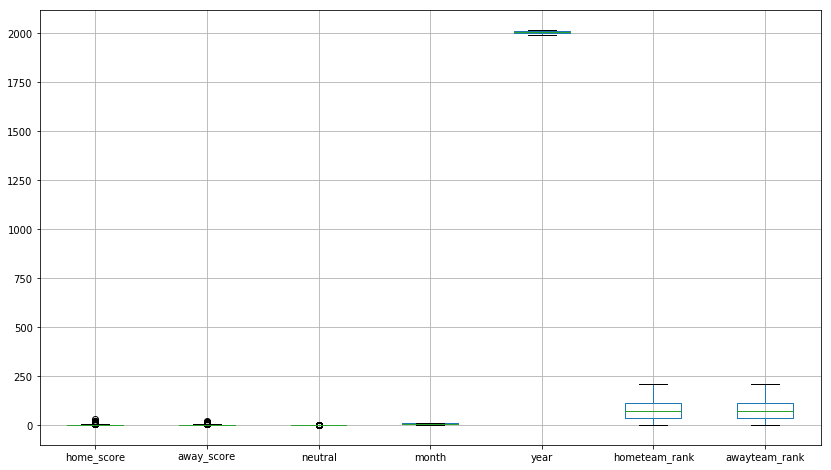

In [159]:
df.boxplot(figsize= (14,8))


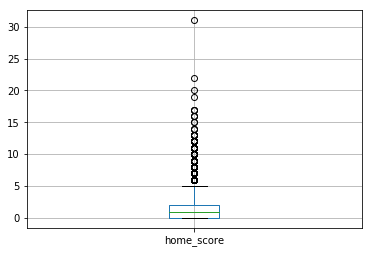

In [162]:
df.boxplot(['home_score'])

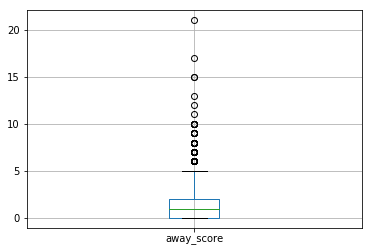

In [163]:
df.boxplot(['away_score'])

In [0]:
bbj